# Checkpoint 4

Gonzalo Cano Padilla

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf

In [4]:
# Parametros del portafolio
n_port = 50
n_sim = 7000
VaR_limit = -0.05
n_activos = 4

tickers = ['AAPL','MSFT','AMZN','JPM']
prices = yf.download(tickers, period='10y', interval='1d', auto_adjust=True)['Close']
prices

[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,JPM,MSFT
Date,,,,
2016-02-25,21.914251,27.757500,43.594315,45.842213
2016-02-26,21.948225,27.761499,43.999588,45.138306
2016-02-29,21.898399,27.625999,43.051395,44.768753
2016-03-01,22.768080,28.952000,45.268959,46.264565
2016-03-02,22.817904,29.010500,45.697189,46.590126
...,...,...,...,...
2026-02-18,264.350006,204.789993,308.779999,398.690002
2026-02-19,260.579987,204.860001,308.049988,398.459991
2026-02-20,264.579987,210.110001,310.790009,397.230011


In [13]:
rets = prices.pct_change().dropna()
mu = rets.mean().values
cov_matrix = rets.cov().values

print("Rendimientos promedio diarios:")
for t, m in zip(tickers, mu):
    print(f"  {t}: {m:.5f} ({m*252*100:.2f}% anual)")

print(f"\nMatriz de covarianza:\n{pd.DataFrame(cov_matrix, index=tickers, columns=tickers).round(6)}")


Rendimientos promedio diarios:
  AAPL: 0.00117 (29.45% anual)
  MSFT: 0.00101 (25.49% anual)
  AMZN: 0.00091 (23.00% anual)
  JPM: 0.00099 (25.06% anual)

Matriz de covarianza:
          AAPL      MSFT      AMZN       JPM
AAPL  0.000332  0.000214  0.000130  0.000204
MSFT  0.000214  0.000418  0.000108  0.000230
AMZN  0.000130  0.000108  0.000298  0.000123
JPM   0.000204  0.000230  0.000123  0.000286


In [14]:
np.random.seed(42)

resultados = []
rets_sim_dict = {}
pesos_dict = {}  # guardamos pesos aparte también

L = np.linalg.cholesky(cov_matrix)

for i in range(n_port):
    w = pesos[i]

    ret_esp = w @ mu
    std_port = np.sqrt(w @ cov_matrix @ w)

    Z = np.random.standard_normal((n_sim, n_activos))
    rets_sim_activos = Z @ L.T + mu
    rets_sim_port = rets_sim_activos @ w

    var_95 = np.percentile(rets_sim_port, 5)

    rets_sim_dict[i] = rets_sim_port  # array de 7000
    pesos_dict[i] = w                 # array de 4

    resultados.append({
        'portafolio': i,
        'ret_esperado': float(ret_esp),
        'std': float(std_port),
        'var_95': float(var_95)
        # sin pesos ni rets_sim
    })

df = pd.DataFrame(resultados)[['portafolio', 'ret_esperado', 'std', 'var_95']]
df

,portafolio,ret_esperado,std,var_95
0,0,0.000999,0.015642,-0.024442
1,1,0.001006,0.016196,-0.025591
2,2,0.001026,0.015996,-0.024595
3,3,0.001117,0.016329,-0.025893
4,4,0.001009,0.014717,-0.023143
5,5,0.001068,0.014946,-0.023406
6,6,0.001031,0.016224,-0.025964
7,7,0.001034,0.014510,-0.022622
8,8,0.000968,0.014598,-0.023388
9,9,0.000981,0.014153,-0.021521


In [15]:
df['cumple'] = df['var_95'] >= VaR_limit

df_validos  = df[df['cumple']]
idx_optimo  = df_validos['ret_esperado'].idxmax()
idx_libre   = df['ret_esperado'].idxmax()

port_optimo = df.loc[idx_optimo]
port_libre  = df.loc[idx_libre]
sacrificio  = port_libre['ret_esperado'] - port_optimo['ret_esperado']

print(f"Portafolios que cumplen: {df['cumple'].sum()} de {n_port}")
print(f"Rendimiento sacrificado: {sacrificio*252*100:.2f}% anual")

df

Portafolios que cumplen: 50 de 50
Rendimiento sacrificado: 0.00% anual


,portafolio,ret_esperado,std,var_95,cumple
0,0,0.000999,0.015642,-0.024442,True
1,1,0.001006,0.016196,-0.025591,True
2,2,0.001026,0.015996,-0.024595,True
3,3,0.001117,0.016329,-0.025893,True
4,4,0.001009,0.014717,-0.023143,True
5,5,0.001068,0.014946,-0.023406,True
6,6,0.001031,0.016224,-0.025964,True
7,7,0.001034,0.014510,-0.022622,True
8,8,0.000968,0.014598,-0.023388,True
9,9,0.000981,0.014153,-0.021521,True


In [16]:
# Portafolio óptimo
print(f"Portafolio óptimo: #{idx_optimo}")
print(f"  Rendimiento esperado: {port_optimo['ret_esperado']*252*100:.2f}% anual")
print(f"  Desviación estándar:  {port_optimo['std']*np.sqrt(252)*100:.2f}% anual")
print(f"  VaR 95%:              {port_optimo['var_95']*100:.2f}%")
print(f"\n  Pesos:")
for activo, peso in zip(tickers, pesos_dict[idx_optimo]):
    print(f"    {activo}: {peso*100:.2f}%")

Portafolio óptimo: #3
  Rendimiento esperado: 28.16% anual
  Desviación estándar:  25.92% anual
  VaR 95%:              -2.59%

  Pesos:
    AAPL: 73.56%
    MSFT: 9.83%
    AMZN: 8.26%
    JPM: 8.34%


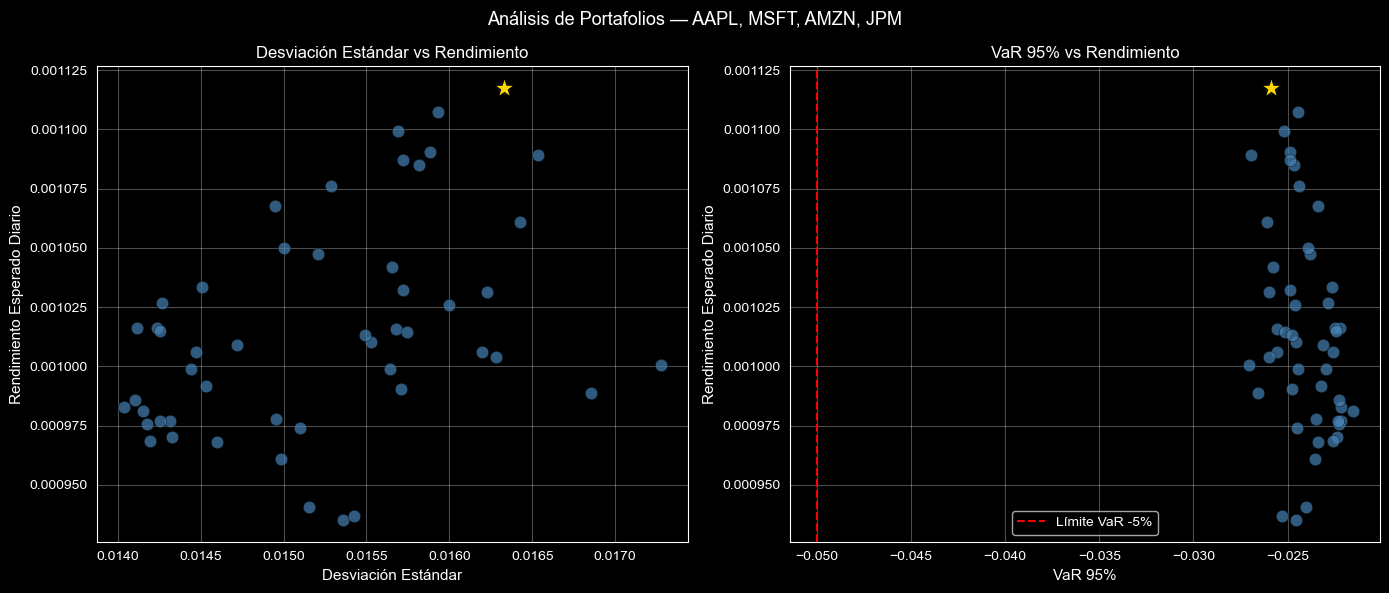

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

config = [('std', 'Desviación Estándar'), ('var_95', 'VaR 95%')]

for ax, (col, label) in zip(axes, config):
    ax.scatter(df[col], df['ret_esperado'],
               color='steelblue', alpha=0.7, edgecolors='black', linewidths=0.4, s=80)

    ax.scatter(port_optimo[col], port_optimo['ret_esperado'],
               color='gold', edgecolors='black', s=250, zorder=5, marker='*')

    if col == 'var_95':
        ax.axvline(VaR_limit, color='red', linestyle='--', linewidth=1.5, label='Límite VaR -5%')
        ax.legend()

    ax.set_xlabel(label, fontsize=11)
    ax.set_ylabel('Rendimiento Esperado Diario', fontsize=11)
    ax.set_title(f'{label} vs Rendimiento', fontsize=12)
    ax.grid(True, alpha=0.3)

plt.suptitle('Análisis de Portafolios — AAPL, MSFT, AMZN, JPM', fontsize=13)
plt.tight_layout()
plt.show()

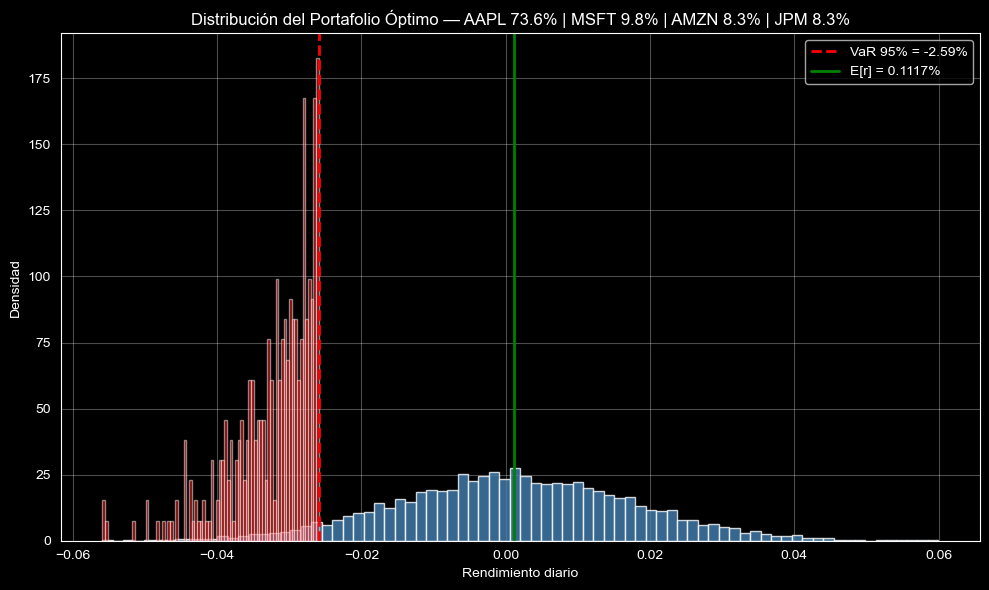

In [18]:
rets_opt = rets_sim_dict[idx_optimo]
var_opt  = port_optimo['var_95']
ret_opt  = port_optimo['ret_esperado']

fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(rets_opt, bins=80, color='steelblue', edgecolor='white', alpha=0.8, density=True)
ax.hist(rets_opt[rets_opt <= var_opt], bins=80, color='red', alpha=0.5, density=True)

ax.axvline(var_opt, color='red', linewidth=2, linestyle='--', label=f'VaR 95% = {var_opt*100:.2f}%')
ax.axvline(ret_opt, color='green', linewidth=2, label=f'E[r] = {ret_opt*100:.4f}%')

ax.set_title('Distribución del Portafolio Óptimo — AAPL 73.6% | MSFT 9.8% | AMZN 8.3% | JPM 8.3%')
ax.set_xlabel('Rendimiento diario')
ax.set_ylabel('Densidad')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [19]:
print(f"¿Cuántos portafolios cumplen VaR >= -5%?")
print(f"  {df['cumple'].sum()} de {n_port} portafolios ({df['cumple'].sum()/n_port*100:.0f}%)")

print(f"\n¿Cuánto rendimiento se sacrifica por controlar riesgo?")
print(f"  Sin restricción: {port_libre['ret_esperado']*252*100:.2f}% anual")
print(f"  Con restricción: {port_optimo['ret_esperado']*252*100:.2f}% anual")
print(f"  Sacrificio:      {sacrificio*252*100:.2f}% anual")

¿Cuántos portafolios cumplen VaR >= -5%?
  50 de 50 portafolios (100%)

¿Cuánto rendimiento se sacrifica por controlar riesgo?
  Sin restricción: 28.16% anual
  Con restricción: 28.16% anual
  Sacrificio:      0.00% anual


---
## Aplicación 2: Escenarios macroeconomicos

In [21]:
n_sim2 = 10000

escenarios = {
    'Base':    mu,
    'Alcista': mu + 0.001,
    'Bajista': mu - 0.001
}

# Usamos los pesos del portafolio óptimo
w_opt = pesos_dict[idx_optimo]

sim_resultados = {}

for nombre, mu_esc in escenarios.items():
    Z = np.random.standard_normal((n_sim2, n_activos))
    rets_sim = (Z @ L.T + mu_esc) @ w_opt
    sim_resultados[nombre] = rets_sim

metricas = []

for nombre, rets in sim_resultados.items():
    metricas.append({
        'Escenario':       nombre,
        'Rendimiento avg': round(float(np.mean(rets)) * 252 * 100, 2),
        'Desv. Std':       round(float(np.std(rets)) * np.sqrt(252) * 100, 2),
        'Prob. Pérdida':   round(float(np.mean(rets < 0)) * 100, 2),
        'VaR 95%':         round(float(np.percentile(rets, 5)) * 100, 4)
    })

df_metricas = pd.DataFrame(metricas).set_index('Escenario')
df_metricas

,Rendimiento avg,Desv. Std,Prob. Pérdida,VaR 95%
Escenario,,,,
Base,26.25,25.70,47.34,-2.5557
Alcista,58.70,26.06,44.53,-2.4682
Bajista,5.18,25.77,49.25,-2.6260


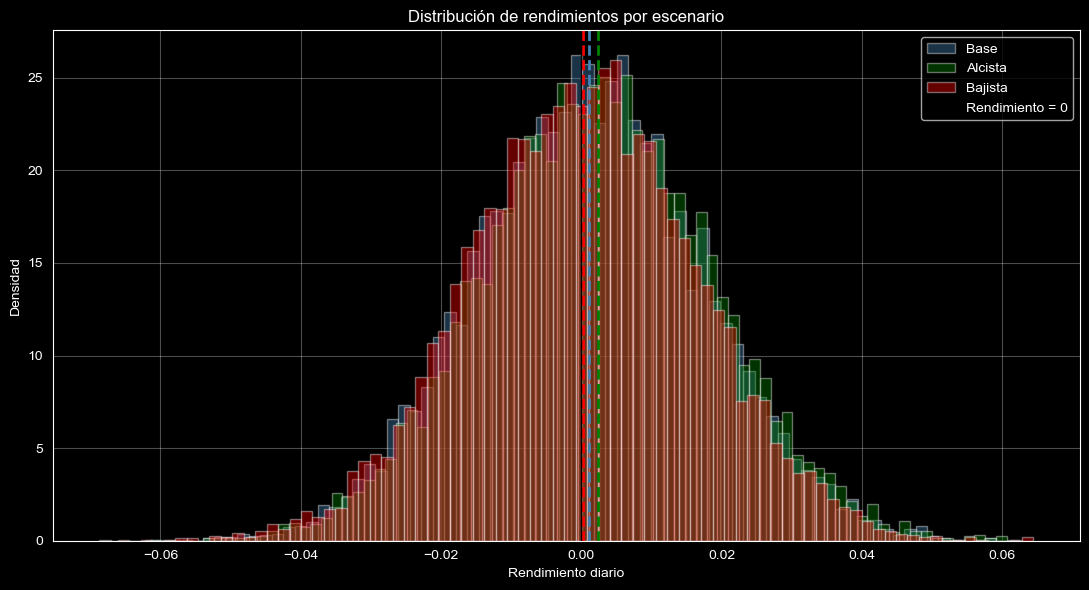

In [22]:
colores = {'Base': 'steelblue', 'Alcista': 'green', 'Bajista': 'red'}

fig, ax = plt.subplots(figsize=(11, 6))

for nombre, rets in sim_resultados.items():
    ax.hist(rets, bins=80, density=True, alpha=0.4,
            color=colores[nombre], label=nombre)
    ax.axvline(np.mean(rets), color=colores[nombre], linewidth=2, linestyle='--')

ax.axvline(0, color='black', linewidth=1, linestyle='-', label='Rendimiento = 0')
ax.set_xlabel('Rendimiento diario')
ax.set_ylabel('Densidad')
ax.set_title('Distribución de rendimientos por escenario')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

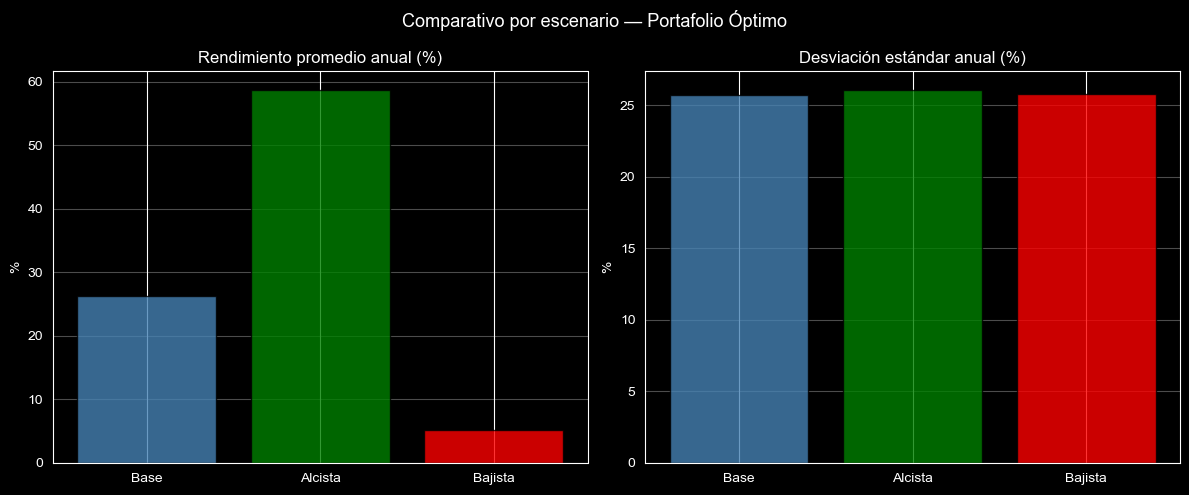

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

nombres = list(sim_resultados.keys())
medias  = [np.mean(r) * 252 * 100 for r in sim_resultados.values()]
stds    = [np.std(r) * np.sqrt(252) * 100 for r in sim_resultados.values()]
color_list = [colores[n] for n in nombres]

axes[0].bar(nombres, medias, color=color_list, edgecolor='black', alpha=0.8)
axes[0].set_title('Rendimiento promedio anual (%)')
axes[0].set_ylabel('%')
axes[0].grid(True, alpha=0.3, axis='y')

axes[1].bar(nombres, stds, color=color_list, edgecolor='black', alpha=0.8)
axes[1].set_title('Desviación estándar anual (%)')
axes[1].set_ylabel('%')
axes[1].grid(True, alpha=0.3, axis='y')

plt.suptitle('Comparativo por escenario — Portafolio Óptimo', fontsize=13)
plt.tight_layout()
plt.show()

## Análisis de Escenarios Macroeconómicos

### 1. ¿En qué escenario la probabilidad de pérdida es mayor?

El escenario **Bajista** presenta la mayor probabilidad de pérdida con **49.25%**,
seguido del Base (47.34%) y el Alcista (44.53%). Esto es consistente con la lógica
del modelo: al reducir la media en -0.001 diario, la distribución de rendimientos
se desplaza hacia la izquierda, incrementando el área bajo la curva en zona negativa.

### 2. ¿Cuál presenta mayor dispersión de resultados?

Los tres escenarios muestran desviaciones estándar prácticamente idénticas:

| Escenario | Desv. Std Anual |
|-----------|----------------|
| Base      | 25.70%         |
| Alcista   | 26.06%         |
| Bajista   | 25.77%         |

Esto era de esperarse, ya que únicamente se modificó la media ($\mu$) entre escenarios,
manteniendo la matriz de covarianza constante. La dispersión depende de la volatilidad,
no del nivel de rendimiento espera